In [2]:
# Import Dependencies
import pandas as pd
from IPython.display import display
from sqlalchemy import create_engine, MetaData, select
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [3]:
# Define database connection parameters
database_params = {
    'user': 'postgres',                   # Update with individual user name
    'password': 'Connor1818!',            # update with individual password
    'host': 'localhost',
    'port': '5432',
    'database': 'CreditCardTransactions'  # Update with your actual database name
}

# Construct the connection string
connection_string = f"postgresql://{database_params['user']}:{database_params['password']}@{database_params['host']}:{database_params['port']}/{database_params['database']}"

# Create a SQLAlchemy engine
engine = create_engine(connection_string)

# Define the table name
table_name = 'creditcardtransactions'

# Query all data from the table into a pandas DataFrame
query = f'SELECT * FROM {table_name}'
df = pd.read_sql(query, engine)

# Display the DataFrame
display(df.head())

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
# Display data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   v1      568630 non-null  float64
 2   v2      568630 non-null  float64
 3   v3      568630 non-null  float64
 4   v4      568630 non-null  float64
 5   v5      568630 non-null  float64
 6   v6      568630 non-null  float64
 7   v7      568630 non-null  float64
 8   v8      568630 non-null  float64
 9   v9      568630 non-null  float64
 10  v10     568630 non-null  float64
 11  v11     568630 non-null  float64
 12  v12     568630 non-null  float64
 13  v13     568630 non-null  float64
 14  v14     568630 non-null  float64
 15  v15     568630 non-null  float64
 16  v16     568630 non-null  float64
 17  v17     568630 non-null  float64
 18  v18     568630 non-null  float64
 19  v19     568630 non-null  float64
 20  v20     568630 non-null  float64
 21  v21     56

In [5]:
# Cleaning

# Convert non-float values to NaN
learning_df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows containing NaN values
learning_df = learning_df.dropna()

# Display the resulting DataFrame
print(learning_df.head())

   id        v1        v2        v3        v4        v5        v6        v7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         v8        v9  ...       v21       v22       v23       v24       v25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        v26       v27       v28    amount  c

Connection to the localhost for user postgres created successfully.
   id        v1        v2        v3        v4        v5        v6        v7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         v8        v9  ...       v21       v22       v23       v24       v25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666 

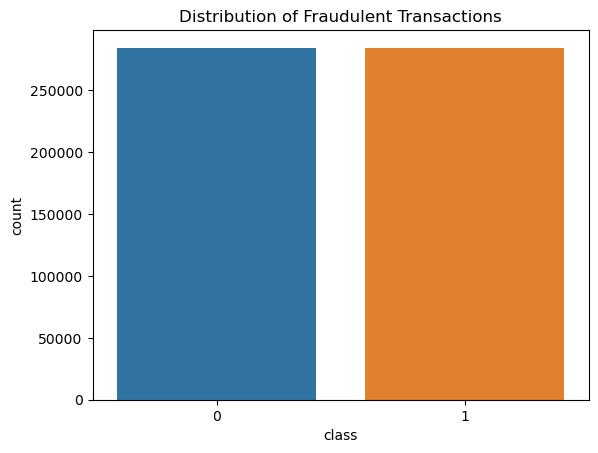

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56734
           1       1.00      1.00      1.00     56992

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

[[56669    65]
 [  122 56870]]


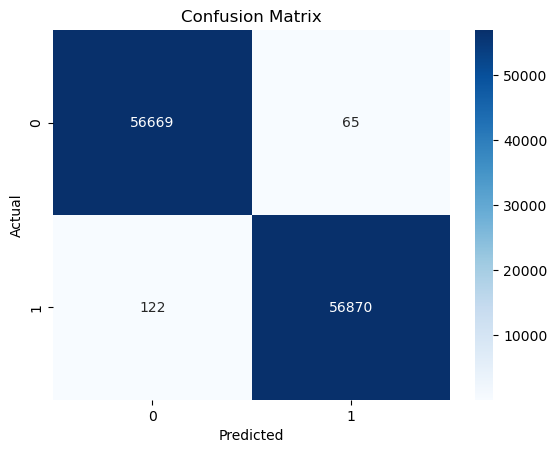

In [15]:
# Define the database credentials
user = 'postgres'                   # Update with individual username
password = 'Connor1818!'            # Update with individual Password
host = 'localhost'
port = 5432
database = 'CreditCardTransactions' # Update with your actual database name 

# Python function to connect to the PostgreSQL database
def get_connection():
    return create_engine(
        f"postgresql://{user}:{password}@{host}:{port}/{database}"
    )

# Main function
if __name__ == '__main__':
    try:
        # Get the connection object (engine) for the database
        engine = get_connection()
        print(f"Connection to the {host} for user {user} created successfully.")
    except Exception as ex:
        print("Connection could not be made due to the following error:\n", ex)

    # Establish a connection to the database
    connection = engine.connect()

    # Reflect an existing table
    metadata = MetaData()
    metadata.reflect(bind=engine)
    your_table = metadata.tables['creditcardtransactions']

    # Select all rows from the table
    select_query = select([your_table])

    # Execute the select query and load the result into a DataFrame
    creditcard_df = pd.read_sql_query(select_query, engine)

    # Close the connection
    connection.close()

    # Display the first few rows of the DataFrame
    print(creditcard_df.head())

    # Check the distribution of the target variable (class)
    sns.countplot(x='class', data=creditcard_df)
    plt.title('Distribution of Fraudulent Transactions')
    plt.show()

    # Split the data into features (X) and target variable (y)
    X = creditcard_df.drop('class', axis=1)
    y = creditcard_df['class']

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Build a logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()